# Perkenalan

Nama : Immanuel Yosia Alfrenco


---



Pertama kita harus memasukan data yang akan digunakan dalam tugas ini yang sudah diperoleh dengan melakukan query pada Google Cloud Big Query

In [59]:
# Query yang digunakan pada Google Cloud Big Query
# SELECT report_date, load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion` WHERE report_date >= '2021-01-01' ORDER BY report_date

# Import Library

Sebelum memulai mengolah data kita harus melakukan import terlebih dahulu semua library yang nantinya akan digunakan dalam analisa ini

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Setelah import library kita akan load data yang akan digunakan

In [2]:
# Memasukan data csv yang akan digunakan
df = pd.read_csv('h8dsft_P0GC2_immanuel_yosia_alfrenco.csv')

Setelah melakukan import kita harus mengecek head dan tail dari data yang akan digunakan

In [3]:
# Mengecek bentuk dari data
df.shape

(26157, 5)

In [4]:
# Mengecek head dari data
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


In [5]:
# Mengecek tail dari data
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


Dari head dan tail kita bisa melihat ternyata ada beberapa missing values pada kolom `load_weight`

In [6]:
# Mengecek informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


Kita bisa melihat data kita memiliki 5 kolom dimana ada 1 kolom numeric dan 4 kolom object.

# Problem 1 (Stats)

## 1

Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

Setelah melakukan load data, kita harus melakukan cleaning pada data atau membersihkan missing value pada data yang akan digunakan sebelum dilakukan analisis.

In [7]:
# Mengecek jumlah missing values pada tiap kolom
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

Kita bisa melihat terdapat 1048 missing values pada kolom `load_weight`

`Load_weight` merupakan kolom yang berisi data numerik dimana untuk mengisi missing valuesnya kita harus mengecek tipe persebaran datanya terlebih dahulu. 

Jika data `load_weight` berdistribusi normal maka missing values akan kita ganti menggunakan mean dari data. 

Jika data `load_weight` bertipe skewed maka missing values akan kita ganti menggunakan median dari data.

Skewness value :  3.335938213321684


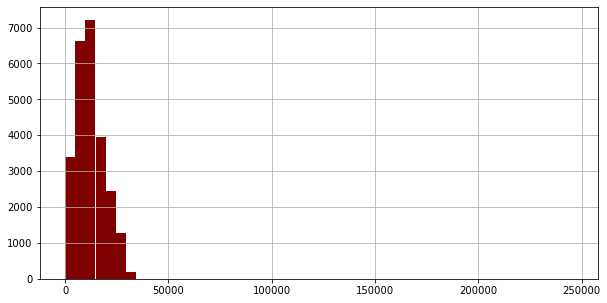

In [8]:
# Mengecek tipe persebaran data pada kolom load weight

print('Skewness value : ', df['load_weight'].skew())
df['load_weight'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Ternyata kolom `load_weight` bertipe skewed atau lebih tepatnya right skew, maka missing values dari kolom `load_weight` akan digantikan dengan median dari kolom tersebut.

In [9]:
df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

Sekarang sudah tidak ada lagi missing values pada kolom `load_weight`

## 2

Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

Kita ingin melihat rentang waktu pengumpulan data sepanjang 2021

In [98]:
# Mencoba menghitung rentang waktu data

df['report_date'] = pd.to_datetime(df['report_date']) # digunakan untuk merubah tipe data kolom report date menjadi datetime
start_date = df['report_date'].iloc[0]
end_date = df['report_date'].iloc[-1]
span = (end_date - start_date) / np.timedelta64(1, 'D')
print(f'Rentang waktu pengambilan data selama tahun 2021 adalah {int(span)} hari')

Rentang waktu pengambilan data selama tahun 2021 adalah 189 hari




---


Kita bisa melihat juga tipe-tipe load sampah yang ada di kota Austin

In [99]:
df['load_type'].unique()

array(['SWEEPING', 'TIRES', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING',
       'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER',
       'ORGANICS', 'BRUSH', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)



---


Kita juga bisa mengetahui tempat pembuangan sampah di kota Austin ada dimana saja

In [100]:
df['dropoff_site'].unique()

array(['ONION CREEK', 'MRF', 'TDS - MRF', 'HORNSBY BEND', 'TDS LANDFILL',
       'ORGANICS BY GOSH', 'BALCONES RECYCLING', 'AUSTIN IRON AND METAL',
       'PARK CENTER', 'ON ROUTE HIGH DUMP', 'WILCAB', 'GREAT NORTHERN',
       'AUSTIN WOOD RECYCLING', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS'], dtype=object)



---

Kita juga ingin mengetahui berapa berat sampah tertinggi yang ada di dalam data

In [101]:
df['load_weight'].max()

245540.0

In [102]:
df.groupby('load_type')['load_weight'].max()

load_type
BRUSH                         19660.0
BULK                          28000.0
CONTAMINATED ORGANICS         25380.0
CONTAMINATED RECYCLING         5160.0
DEAD ANIMAL                    1720.0
GARBAGE COLLECTIONS          245540.0
LITTER                        16700.0
MIXED LITTER                  10560.0
ORGANICS                      29660.0
RECYCLED METAL                20760.0
RECYCLING - SINGLE STREAM     27060.0
SWEEPING                      22760.0
TIRES                         18940.0
YARD TRIMMING                 20460.0
Name: load_weight, dtype: float64

Dari data di atas kita bisa melihat jenis sampah garbage collection memiliki berat muatan tertinggi dalam data, sedangkan jenis sampah dead animal memiliki berat muatan paling kecil dalam data.

## 3

Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota?



---

Selanjutnya kita ingin mencari central tendency dari tiap site 

In [103]:
df.groupby(['dropoff_site']).mean()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,451.200000
AUSTIN WOOD RECYCLING,4050.000000
BALCONES RECYCLING,9464.652072
BALCONES WOODS,8460.000000
GREAT NORTHERN,11973.142857
HORNSBY BEND,6637.111782
MRF,1799.982143
ON ROUTE HIGH DUMP,11405.925926
ONION CREEK,11300.000000


In [104]:
df.groupby(['dropoff_site']).median()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,400.0
AUSTIN WOOD RECYCLING,4050.0
BALCONES RECYCLING,9840.0
BALCONES WOODS,8460.0
GREAT NORTHERN,11300.0
HORNSBY BEND,6400.0
MRF,1360.0
ON ROUTE HIGH DUMP,11300.0
ONION CREEK,11300.0


In [105]:
df['dropoff_site'].mode()

0    TDS LANDFILL
dtype: object

Dari central tendency di atas kita bisa menarik insight bahwa rata-rata berat sampah paling kecil ada di site Austin Iron and Metal, sedangkan rata-rata berat sampah paling tinggi ada di Westfield. Data di atas juga menunjukan bahwa site TDS Landfill memiliki jumlah data paling banyak.


---



## 4

Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

Saya akan memilih site MRF karena memiliki nilai mean dan median yang cukup berbeda dibandingkan dengan site lainnya




## 5

Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

Pertama kita harus mengecek apakah ada outliers secara visual meggunakan box-plot

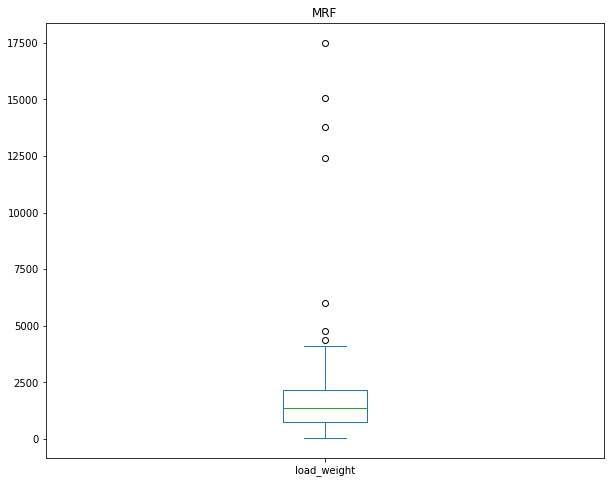

In [106]:
mrf = df[df['dropoff_site'] == 'MRF']
mrf['load_weight'].plot(kind='box', title='MRF', figsize=(10,8))
plt.show()

Dari visual di atas bisa dilihat bahwa `load_weight` pada site `MRF` memiliki beberapa outliers. Tahap selanjutnya adalah mengecek distribusi data.

Skewness value :  4.77255984020812


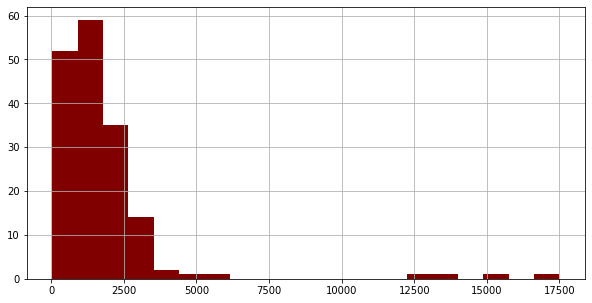

In [107]:
print('Skewness value : ', mrf['load_weight'].skew())
mrf['load_weight'].hist(bins=20, figsize=(10,5), color='maroon')
plt.show()

Histogram di atas menunjukan bahwa distribusi data `load_weight` di site `MRF` tidak berdistribusi normal. Data tersebut memiliki tipe distribusi skewed, lebih tepatnya right skewed dengan nilai skewness 4.77

Karena bertipe skewed, kita akan menghandle outliers dengan menggunakan Tukey's Rule

Pertama kita harus mencari upper dan lower boundaries terlebih dahulu

In [108]:
q1 = mrf['load_weight'].quantile(0.25)
q3 = mrf['load_weight'].quantile(0.75)
iqr = q3 - q1

upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print(f'Nilai upper boundaries = {upper}')
print(f'Nilai lower boundaries = {lower}')

Nilai upper boundaries = 4340.0
Nilai lower boundaries = -1420.0


Setelah mendapatkan nilai upper dan lower boundaries, kita bisa menghapus outliers yang ada di luar upper dan lower boundaries

In [109]:
upper_outliers = (mrf['load_weight'] > upper) 
lower_outliers = (mrf['load_weight'] < lower)
new_mrf = mrf['load_weight'][~(upper_outliers | lower_outliers)]
new_mrf

4        1640.0
5         940.0
564        40.0
565       100.0
749      1440.0
          ...  
25862     340.0
26008    2260.0
26009    1260.0
26010     800.0
26011     560.0
Name: load_weight, Length: 161, dtype: float64

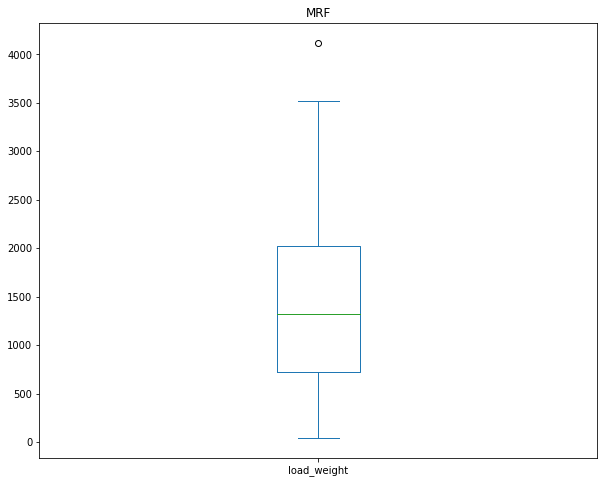

In [110]:
new_mrf.plot(kind='box', title='MRF', figsize=(10,8))
plt.show()

Kita bisa melihat adanya perubahan pada boxplot saat masih ada outliers dan boxplot saat sudah tidak ada outliers dimana datanya lebih rapih dan tidak berjauhan

In [111]:
size_mrf = len(mrf)
size_new_mrf = len(new_mrf)
persen_outliers = (size_mrf - size_new_mrf) / size_mrf
print(f'Jumlah outliers pada site MRF ada {persen_outliers} %')

Jumlah outliers pada site MRF ada 0.041666666666666664 %


Selanjutnya kita akan membandingkan central tendency antara data yang memiliki outliers dengan yang sudah tidak memiliki outliers

In [112]:
print ('Mode Sebelum Trimming : ' + str(mrf['load_weight'].mode()[0]))
print ('Median Sebelum Trimming : ' + str(mrf['load_weight'].median()))
print ('Mean Sebelum Trimming : ' + str(mrf['load_weight'].mean()))
print ('Mode Sesudah Trimming : ' + str(new_mrf.mode()[0]))
print ('Median Sesudah Trimming : ' + str(new_mrf.median()))
print ('Mean Sesudah Trimming : ' + str(new_mrf.mean()))

Mode Sebelum Trimming : 960.0
Median Sebelum Trimming : 1360.0
Mean Sebelum Trimming : 1799.982142857143
Mode Sesudah Trimming : 960.0
Median Sesudah Trimming : 1320.0
Mean Sesudah Trimming : 1419.0496894409937


Setelah dilakukan trimming outliers, kita bisa melihat bahwa tidak ada perubahan pada mode data sedangkan ada perubahan pada mean dan median. Mean dan median setelah trimming lebih kecil dibandingkan dengan mean dan median sebelum trimming yang disebabkan data yang memiliki nilai besar banyak yang dihapus karena termasuk outliers.

## 6

Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [113]:
# Merubah new_mrf dari series menjadi dataframe
new_mrf = new_mrf.to_frame(name='load_weight')
new_mrf

,load_weight
4,1640.0
5,940.0
564,40.0
565,100.0
749,1440.0
...,...
25862,340.0
26008,2260.0
26009,1260.0
26010,800.0


Menghitung range, variance dan standar deviasi dari data di atas

In [114]:
range = new_mrf['load_weight'].max() - new_mrf['load_weight'].min()
var = new_mrf['load_weight'].var()
std = new_mrf['load_weight'].std()

print(f'Load Weight Range = {range}')
print(f'Load Weight Variance = {var}')
print(f'Load Weight Standard Deviation = {std}')

Load Weight Range = 4080.0
Load Weight Variance = 760243.997515528
Load Weight Standard Deviation = 871.9197196505696


Nilai variance yang tinggi menunjukan bahwa data lebih tersebar di sekitaran mean atau rata-rata

## 7

Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

In [115]:
ci = stats.norm.interval(0.95, new_mrf.mean(), std)
ci

(array([-289.88155848]), array([3127.98093737]))

Dari perhitungan di atas, kemungkinan load weight berada di angka -289 sampai 3127. Jadi jika ingin membuat site baru seharusnya memiliki kapasitas penampungan yang bisa mencapai 3127 kg dalam sehari. Data yang saya gunakan ini hanya dari satu site saja yaitu site MRF

## 8

Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).

Saya ingin coba membandingkan apakah berat rata-rata harian antara dua `load_type` berbeda secara signifikan atau tidak dengan menggunakan two samples independent two tailed test. `load_type` yang dipilih adalah 'RECYCLING - SINGLE STREAM' dan 'ORGANICS'.

In [116]:
rec = df[df['load_type'] =='RECYCLING - SINGLE STREAM' ][['report_date','load_weight']].groupby('report_date').sum()
org = df[df['load_type'] =='ORGANICS' ][['report_date','load_weight']].groupby('report_date').sum()

print(f'Rata-rata load weight dari RECYCLING - SINGLE STREAM adalah = {np.round(rec.load_weight.mean())}')
print(f'Rata-rata load weight dari ORGANICS adalah = {np.round(org.load_weight.mean())}')

Rata-rata load weight dari RECYCLING - SINGLE STREAM adalah = 492079.0
Rata-rata load weight dari ORGANICS adalah = 453924.0


Jadi Hipotesis untuk kasus ini adalah :

**H0 : μ_RECYCLING - SINGLE STREAM = μ_ORGANICS**

**H1 : μ_RECYCLING - SINGLE STREAM != μ_ORGANICS**

In [117]:
t_stat, p_val = stats.ttest_ind(rec, org)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.12221310922081759
t-statistics: 1.5502413751392106


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


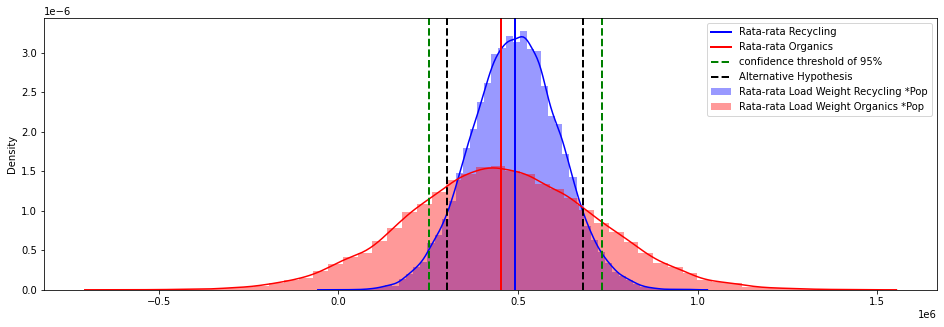

In [118]:
rec_pop = np.random.normal(rec.load_weight.mean(),rec.load_weight.std(),26157)
org_pop = np.random.normal(org.load_weight.mean(),org.load_weight.std(),26157)

ci = stats.norm.interval(0.95, rec.load_weight.mean(), rec.load_weight.std())
plt.figure(figsize=(16,5))
sns.distplot(rec_pop, label='Rata-rata Load Weight Recycling *Pop',color='blue')
sns.distplot(org_pop, label='Rata-rata Load Weight Organics *Pop',color='red')

plt.axvline(rec.load_weight.mean(), color='blue', linewidth=2, label='Rata-rata Recycling')
plt.axvline(org.load_weight.mean(), color='red',  linewidth=2, label='Rata-rata Organics')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(rec_pop.mean()+t_stat[0]*rec_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(rec_pop.mean()-t_stat[0]*rec_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan data di atas, kita gagal menolak H0 yang artinya antara **Recycling** dan **Organics** tidak berbeda secara signifikan dalam hal rata-rata berat sampah harian.

## Pertanyaan

- Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

    Teknik yang saya gunakan adalah Tukey's Rule karena distribusi data yang bertipe skewed dimana dalam kasus saya adalah right skewed


- Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

   Karena kita hanya menggunakan sampel dari populasi, maka hasil perhitungan sampel kita pasti akan memiliki error atau berbeda dari populasi. Confidence Interval merupakan suatu rentang nilai yang didapatkan dari suatu sampel yang nantinya bisa digunakan untuk suatu populasi. Dalam kasus no 7, kita hanya menghitung rata-rata dan standar deviasi dari suatu site, dengan menghitung confidence interval, kita bisa menggunakan hasil perhitungan dari suatu site untuk mewakili keseluruhan populasi dalam bentuk rentang nilai.

- Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

  Jenis uji hipotesis yang saya gunakan adalah two samples independent two tailed test karena saya ingin mengukur hubungan antara 2 variabel yang memiliki rata-rata yang berbeda.

# Problem 2 (Math/Calculus)

Pada permasalahan yang sama, pemerintah ingin tau berapa banyak load sampah dalam kg di kota Austin di hari berikutnya (10 Juli 2021). Dalam hal ini, pemerintah menginginkan kamu melakukan forecasting untuk memprediksi nilai di masa depan. Ada banyak teknik forecasting yang bisa dilakukan tapi kamu tidak perlu khawatir, kita akan menggunakan yang metode yang sangat sederhana yaitu menggunakan rumus kecepatan.

Pertama kita akan mengambil data jumlah `load_weight` setiap harinya

In [90]:
data = df.groupby('report_date', sort = True, as_index = False)['load_weight'].sum()
data

,report_date,load_weight
0,2021-01-01,45200.0
1,2021-01-02,2204030.0
2,2021-01-04,2920260.0
3,2021-01-05,2399840.0
4,2021-01-06,2453050.0
...,...,...
161,2021-07-05,1897290.0
162,2021-07-06,1989440.0
163,2021-07-07,1654780.0
164,2021-07-08,1541950.0


Setelah itu membutuhkan data untuk sumbu x dan y. Kita menggunakan array yang berisi index dari 0 sampai panjang data untuk sumbu x.

In [91]:
x = np.linspace(0, (len(data)-1), len(data))
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Kita akan menjadikan data `load_weight` menjadi array untuk sumbu y

In [92]:
y = data.iloc[:, 1]
y = y.array
y

<PandasArray>
[  45200.0, 2204030.0, 2920260.0, 2399840.0, 2453050.0, 2517430.0, 1912750.0,
   62040.0, 2507910.0, 2085220.0,
 ...
 2078290.0, 2078320.0, 2079170.0, 1739720.0,  276040.0, 1897290.0, 1989440.0,
 1654780.0, 1541950.0,  176840.0]
Length: 166, dtype: float64

Setelah memiliki array x dan y maka kita bisa melakukan perhitungan turunan menggunakan fungsi gradient.

In [93]:
df2 = np.gradient(y,x)
df2

array([ 2.15883000e+06,  1.43753000e+06,  9.79050000e+04, -2.33605000e+05,
        5.87950000e+04, -2.70150000e+05, -1.22769500e+06,  2.97580000e+05,
        1.01159000e+06, -1.80115000e+05,  5.85650000e+04, -1.64495000e+05,
       -1.05549500e+06,  3.34080000e+05,  1.10360000e+06, -1.05460000e+05,
       -5.44450000e+04, -2.03465000e+05, -9.80795000e+05,  3.48225000e+05,
        9.37285000e+05, -1.82305000e+05,  5.02550000e+04, -2.04585000e+05,
       -1.07891000e+06,  3.29555000e+05,  1.02241000e+06, -2.06850000e+05,
        3.18100000e+04, -1.11035000e+05, -1.04741000e+06, -9.00415000e+05,
        1.30428500e+06,  1.13005000e+06, -1.51415000e+05, -7.00980000e+05,
       -2.29460000e+05, -4.19720000e+05, -4.10790000e+05,  1.85615000e+06,
        1.07829000e+06, -1.80905000e+05,  9.75100000e+04, -4.37785000e+05,
       -1.57066000e+06, -1.12695000e+06,  1.45513000e+06,  1.32781000e+06,
       -1.55630000e+05, -4.78000000e+03, -1.74172500e+05, -1.29842000e+06,
       -1.18031750e+06,  

Saat semua data sudah lengkap, kita bisa mulai menghitung degan rumus yang sudah disediakan di soal dan mendapatkan prediksi berat sampah untuk tanggal 10 Juli 2021

In [94]:
# rumus
delta_t = x[-1] - x[-2]
v = df2[-1]
w_besok = y[-1] + (v * delta_t)
print(f'Prediksi berat sampah pada tanggal 10 Juli 2021 adalah {abs(w_besok)}')

Prediksi berat sampah pada tanggal 10 Juli 2021 adalah 1188270.0


## Pertanyaan

- Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

  Untuk menghitung turunan pertama saya menggunakan metode numerik karena data yang ada berupa array.

- Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

  Saya menggunakan fungsi matematis dari numpy yang bernama gradient untuk menghitung turunan

- Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021

  Load weight yang diperkirakan untuk tanggal 10 Juli 2021 adalah 1188270 kg